# Projeto de regressão

Para um projeto de regressão ou classificação, seguimos o seguinte passo-a-passo:

### 1) Aquisição dos dados/Checagem de formatação
    - Load data
    - Checa as formatações
    - Checa se tem dados faltantes
    - Checa natureza das colunas
### 2) Análise exploratória
    - Checagem mais generalista nas variáveis numéricas e categóricas
    - Início da análise
    - Análise das colunas numéricas
    - Análise das colunas categóricas
    
### 3) Pré-processamento
    - Colocar features numéricas em escala
    - Utilizar label encoder ou OneHotEncoder nas features categóricas
    - Criar pipelines e columns transformers
    - Preparar os dados para o modelo
    - Divisão treino-teste ou treino-teste-validação
### 4) Modelos e Avaliação de modelos
    - Criar modelo trivial
    - Criar modelo baseline
    - Criar modelos para comparar com o baseline
    - Cross-val-score
    - Grid-search 
### 5) Avaliação do modelo escolhido no conjunto de teste
    - Avaliação do desempenho no conjunto de teste
    - Treino com todo o data-set


Após todos esses passos, teremos um projeto de ML completo! (Exceto pelo deploy)

## 1) Aquisição dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint

In [2]:
# Load data
def load_california_housing():
    return pd.read_csv('./data/housing.csv')

housing = load_california_housing()

In [3]:
housing.head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


### Describe (https://www.kaggle.com/datasets/camnugent/california-housing-prices):
#### 1. longitude: A measure of how far west a house is; a higher value is farther west
#### 2. latitude: A measure of how far north a house is; a higher value is farther north
#### 3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
#### 4. totalRooms: Total number of rooms within a block
#### 5. totalBedrooms: Total number of bedrooms within a block
#### 6. population: Total number of people residing within a block
#### 7. households: Total number of households, a group of people residing within a home unit, for a block
#### 8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
#### 9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
#### 10. oceanProximity: Location of the house w.r.t ocean/sea

In [4]:
# Checa formatação ---------------------
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Checa se possui dados faltantes ---------------------
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

*) Note que a coluna total_bedrooms possui 207 dados faltantes! Vamos tratar isso.

Para esse caso, vamos utilizar um SimpleImputer nos dados para cobrir os valores faltantes.

In [6]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

imp_mean.fit(housing[['total_bedrooms']])

SimpleImputer()

In [7]:
housing['total_bedrooms'] = imp_mean.transform(housing[['total_bedrooms']])

In [8]:
# Checando novamente
if housing['total_bedrooms'].isna().sum() == 0:
    print("Pronto! Conseguimos imputar a mediana nos valores faltantes.")
else:
    print("Algo parece errado...")

Pronto! Conseguimos imputar a mediana nos valores faltantes.


In [9]:
# Checando novamente a tabela info de dados faltantes:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
# Checa natureza das colunas
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [12]:
print('Colunas numéricas (num): ', [c for c in housing.columns if 'ocean_proximity' != c])
print('Colunas categóricas ordinais (cat): ', ['ocean_proximity'])

Colunas numéricas (num):  ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
Colunas categóricas ordinais (cat):  ['ocean_proximity']


Perfeito! Antes de seguir, vamos ver o describe do nosso dataframe:

In [13]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,537.870553,419.266592,1.0000,297.0000,438.0000,643.25000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


Vamos para as próximas etapas!

## 2) Análise exploratória

Para a análise exploratória vamos checar valor por valor, e para iniciar nossos estudos, vamos visualizar de forma mais generalista com uma tabela de histogramas para as 9 colunas numéricas que temos:

In [14]:
# Regra de bolso para histogramas:
# Pega a raiz do número de amostra para ser o bins_value

bins_value = int(housing.shape[0] ** 0.5)
bins_value

143

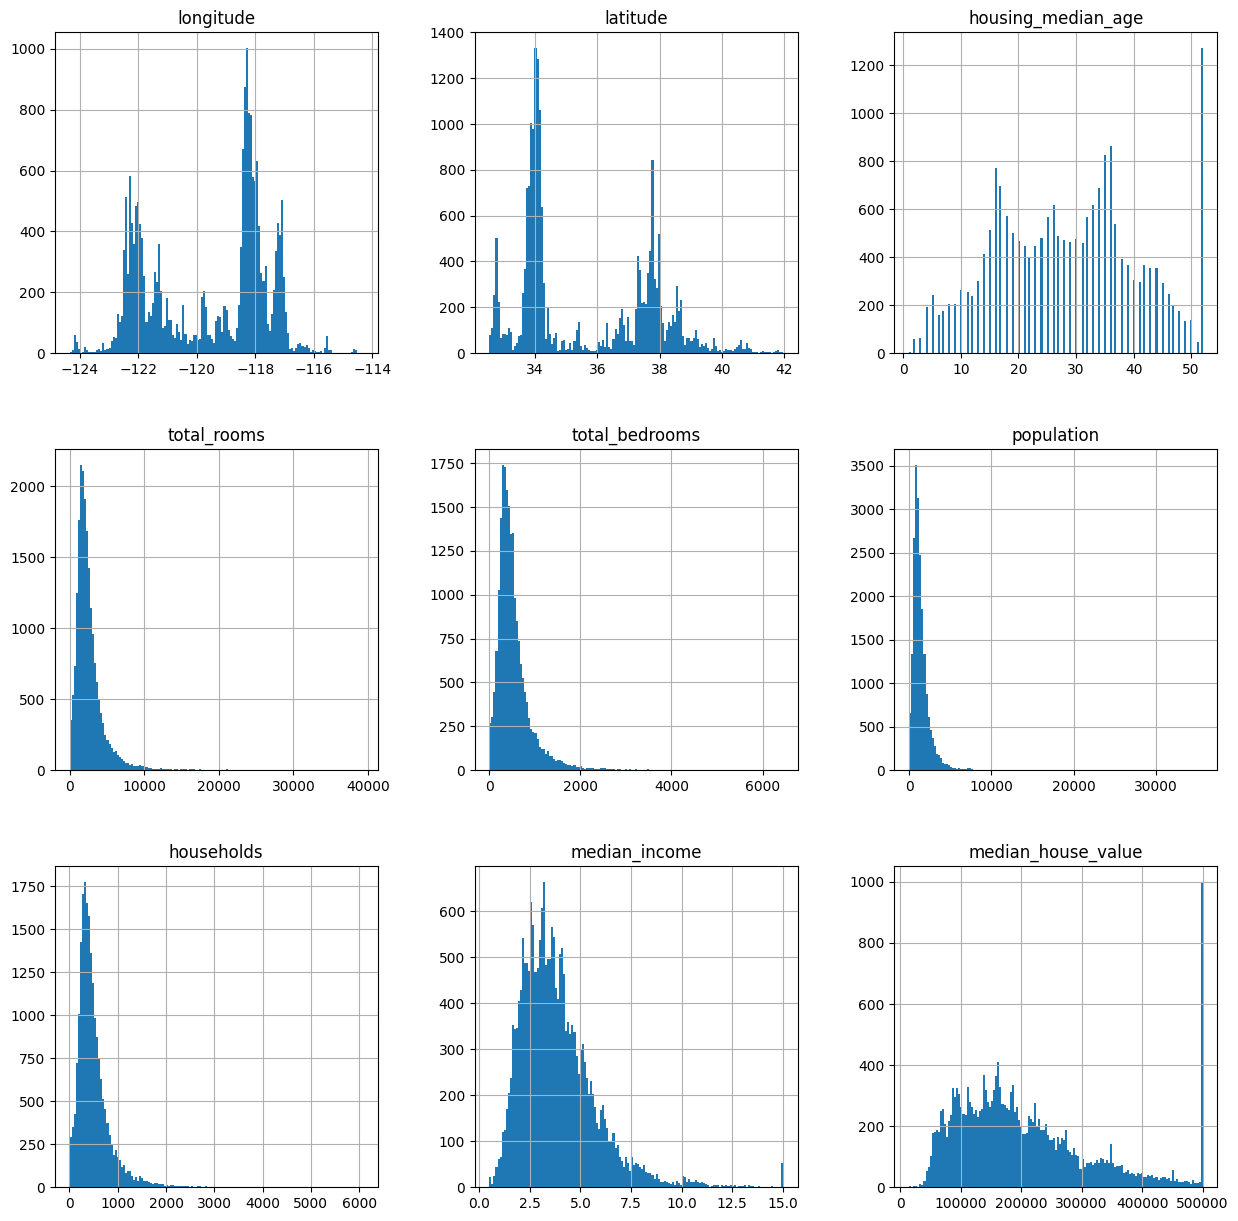

In [15]:
# Checagem mais generalista nas variáveis numéricas
# Tipo 1 - Visualização em histograma
housing.hist(figsize=[15, 15], bins=bins_value);

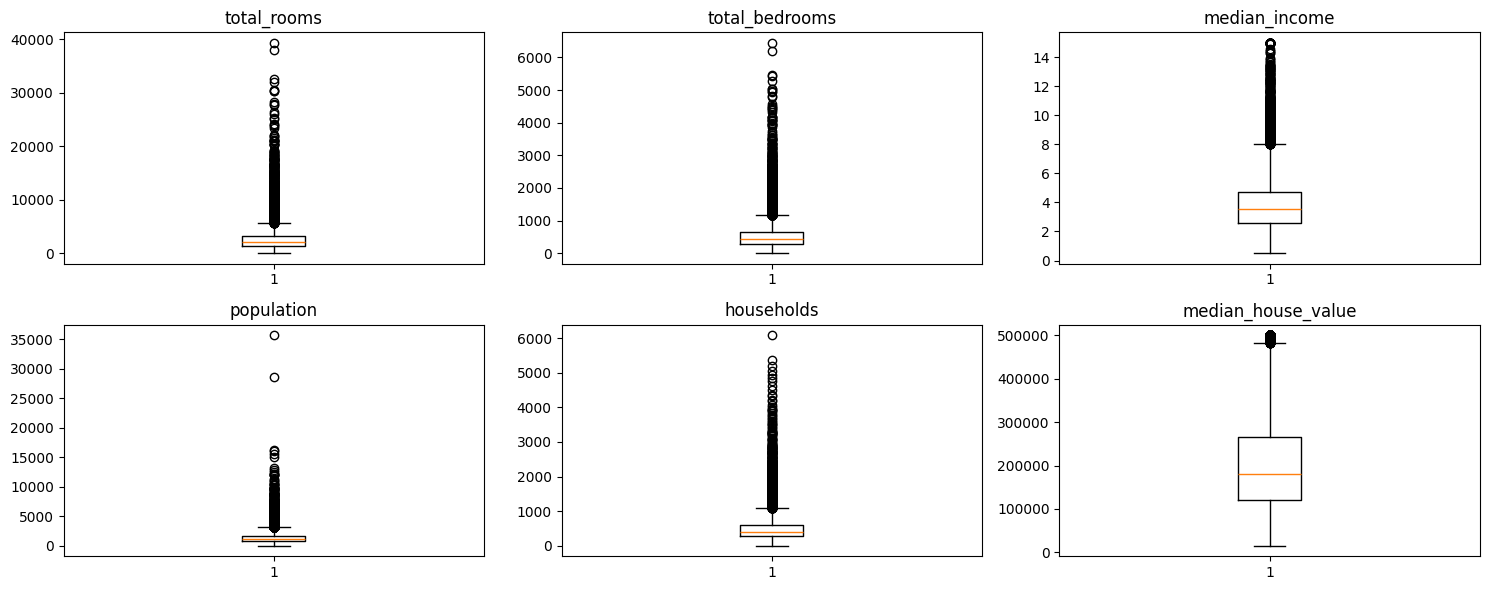

In [16]:
# Checagem mais generalista nas variáveis numéricas
# Tipo 2 - Visualização em Boxplot

# Crie uma figura e uma grade de subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))

# Crie box plots em cada subplot
axes[0, 0].boxplot(housing['total_rooms'])
axes[0, 0].set_title('total_rooms')

axes[0, 1].boxplot(housing['total_bedrooms'])
axes[0, 1].set_title('total_bedrooms')

axes[1, 0].boxplot(housing['population'])
axes[1, 0].set_title('population')

axes[1, 1].boxplot(housing['households'])
axes[1, 1].set_title('households')

axes[0, 2].boxplot(housing['median_income'])
axes[0, 2].set_title('median_income')

axes[1, 2].boxplot(housing['median_house_value'])
axes[1, 2].set_title('median_house_value')

# Ajuste o espaçamento entre subplots
plt.tight_layout()

# Exiba a figura
plt.show()


### Tecendo alguns comentários mais generalistas antes de começar uma análise detalhada:
- Numéricas:
    - histogramas: 
        - total_rooms, total_bedrroms, population, households e median_income aparentam ter assimetria a direita. Isso significa que talvez sejam candidatas a serem aplicadas o np.log
        - median_house_value possui uma saturação no valor de 500_000
        - longitude, latitude são colunas que se referem a posições espaciais, portanto talvez seja interessante plotar em 2D
        - housing_median_age não possui uma forma definida e possui uma saturação no 50
    - Boxplots:
        - Muitos outliers para praticamente todas as colunas numéricas
        - Intuição: Após aplicar o log nas colunas, é provável que a quantidade de outliers diminua

### Início da análise:

Dado os comentários generalistas feitos acima, vamos começar com as colunas [``total_rooms, total_bedrooms, population, households e median_income``].

### total_rooms

Significado: Total number of rooms within a block 

*) Note que estamos falando de valor absoluto!


In [17]:
housing['total_rooms'].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

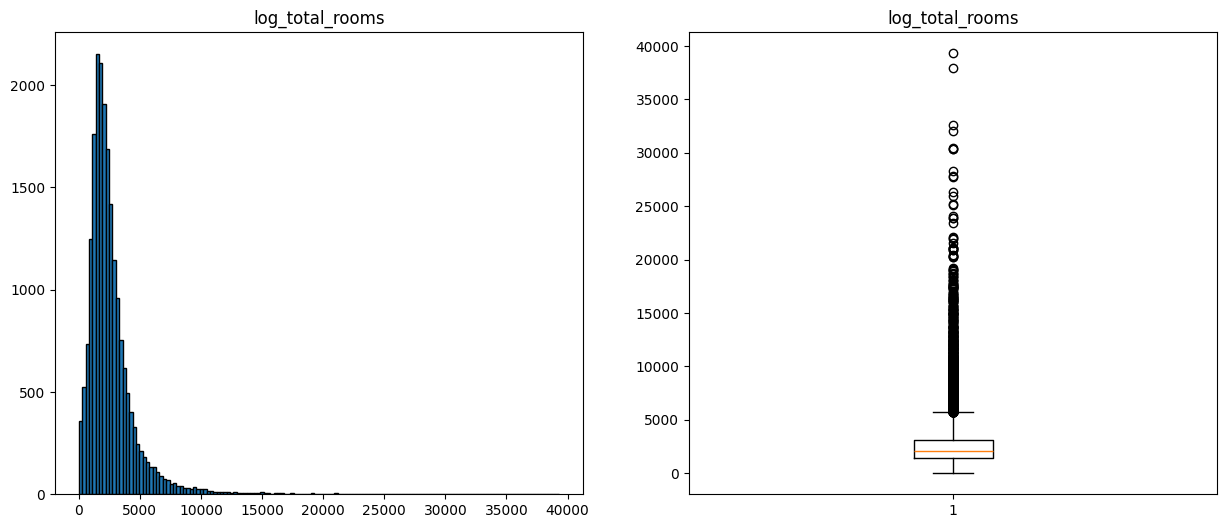

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['total_rooms'], bins=bins_value, edgecolor='black')
axes[0].set_title('log_total_rooms')

axes[1].boxplot(housing['total_rooms'])
axes[1].set_title('log_total_rooms');

Perfeito, porém, vamos analisar o valor médio da coluna por household:

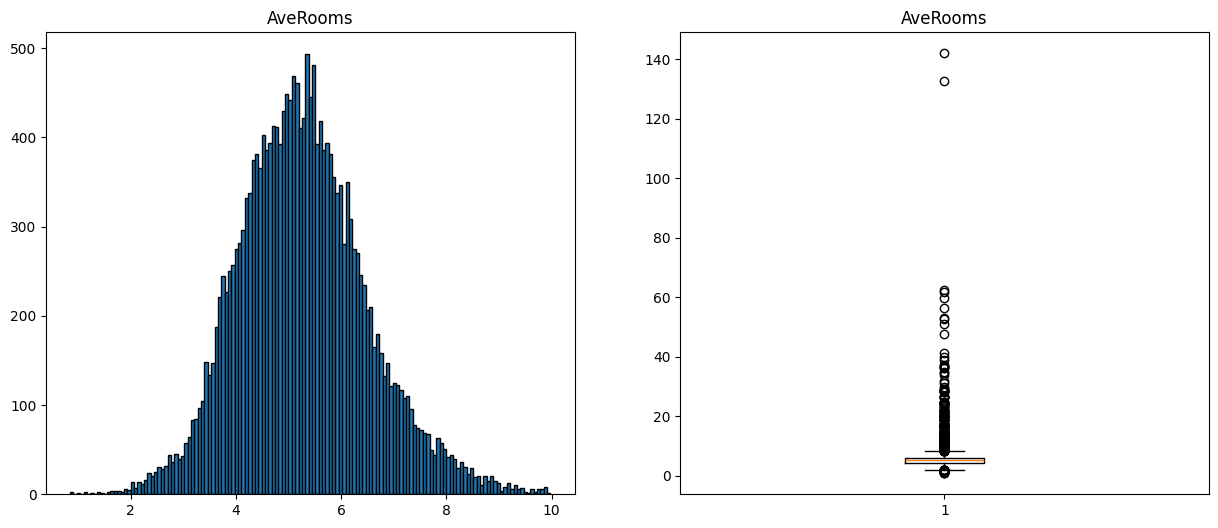

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist((housing['total_rooms'] / housing['households']).where(lambda x: x < 10), bins=bins_value, edgecolor='black')
axes[0].set_title('AveRooms')

axes[1].boxplot(housing['total_rooms'] / housing['households'])
axes[1].set_title('AveRooms');

### Opções:

- temos duas opções: 
    - Aplicar o log no valor absoluto (não explorado)
    - Tirar a média por household (cortando os valores outliers)

Escolha final: Vamos tirar a média e criar uma nova coluna!

In [20]:
housing['AveRooms'] = housing['total_rooms'] / housing['households']

In [21]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,AveRooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513


In [22]:
# Validação de corte: 
print('Quantidade de outliers que entrarão no corte: ', housing['AveRooms'].loc[housing['AveRooms'] > 11].shape)
print('É uma quantidade baixa em relação ao todo, portanto podemos cortar.')

Quantidade de outliers que entrarão no corte:  (176,)
É uma quantidade baixa em relação ao todo, portanto podemos cortar.


In [23]:
original_housing = housing.copy()

In [24]:
housing = original_housing.loc[housing['AveRooms'] < 11]

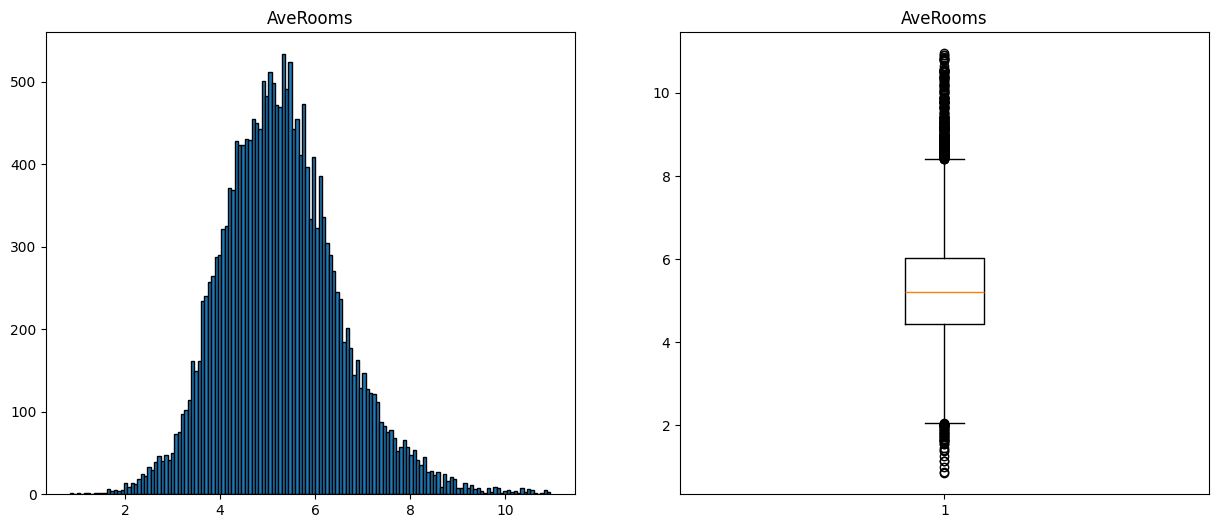

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['AveRooms'], bins=bins_value, edgecolor='black')
axes[0].set_title('AveRooms')

axes[1].boxplot(housing['AveRooms'])
axes[1].set_title('AveRooms');

Perfeito!

### Conclusão:

- Criamos uma nova coluna tal que ela consiste na média de total rooms por households. Em outras palavras, quantidade de rooms por domicílio para cada bloco.
- OBS.: Cortamos alguns outliers! 

----------------------------

### total_bedrooms

totalBedrooms: Total number of bedrooms within a block

Novamente, o mesmo caso anterior, temos valores absolutos.

In [27]:
housing['total_bedrooms'].describe()

count    20463.000000
mean       535.483751
std        417.333783
min          1.000000
25%        297.000000
50%        435.000000
75%        642.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

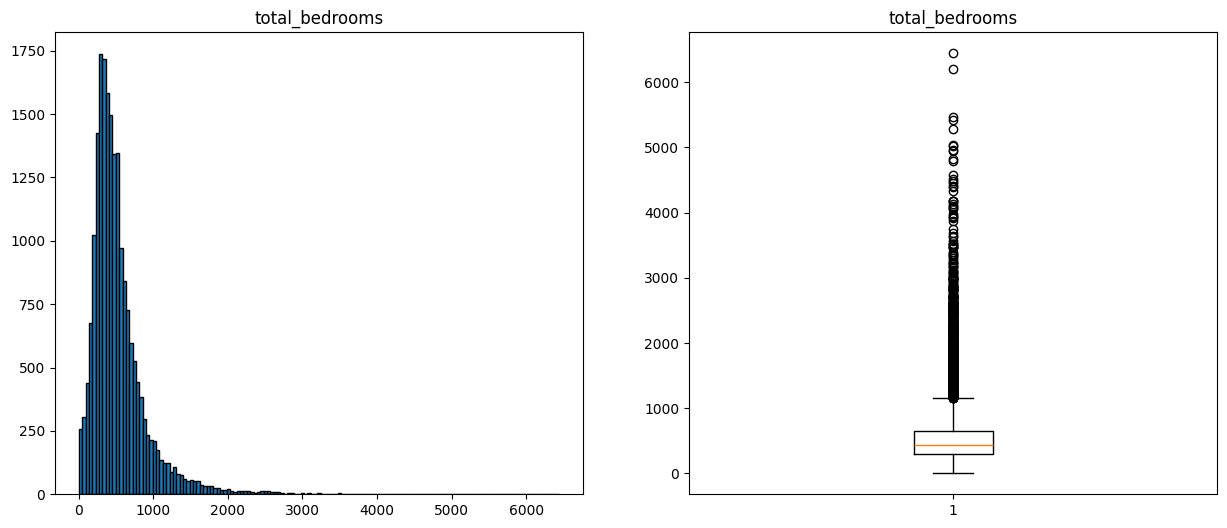

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['total_bedrooms'], bins=bins_value, edgecolor='black')
axes[0].set_title('total_bedrooms')

axes[1].boxplot(housing['total_bedrooms'])
axes[1].set_title('total_bedrooms');

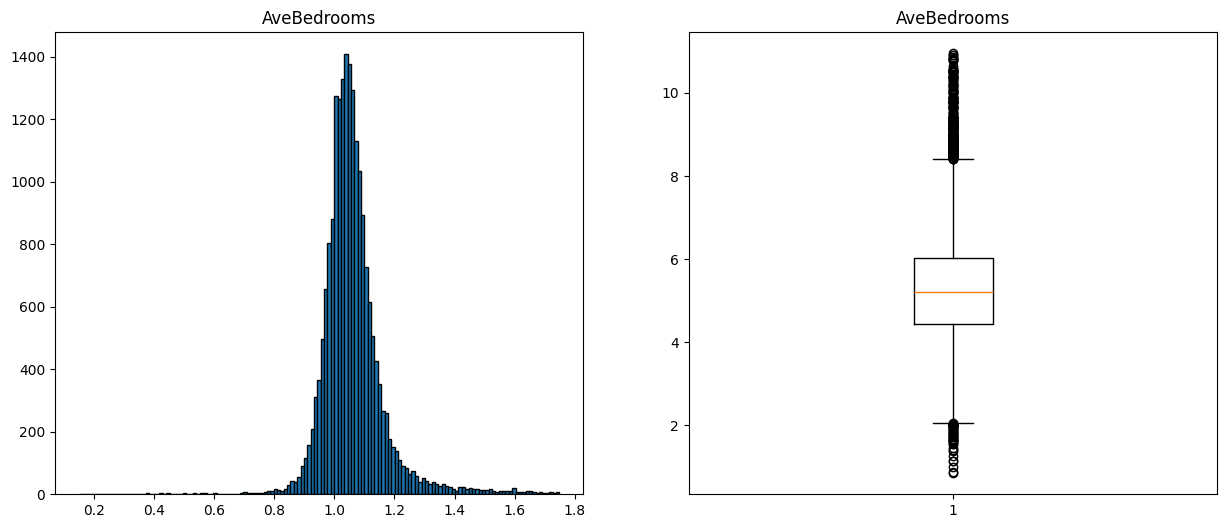

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist((housing['total_bedrooms'] / housing['households']).where(lambda x: x < 1.75).where(lambda x: x > -0.5), bins=bins_value, edgecolor='black')
axes[0].set_title('AveBedrooms')

axes[1].boxplot((housing['total_rooms'] / housing['households']))
axes[1].set_title('AveBedrooms');

### Opções:

- temos duas opções: 
    - Aplicar o log no valor absoluto
    - Tirar a média por household (cortando os valores outliers)

Escolha final: Vamos tirar a média e criar uma nova coluna!

In [42]:
housing['AveBedrooms'] = housing['total_bedrooms'] / housing['households']

C:\Users\gabri\AppData\Local\Temp\ipykernel_8544\1638316843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['AveBedrooms'] = housing['total_bedrooms'] / housing['households']


In [43]:
# Validação de corte: 
print('Quantidade de outliers que entrarão no corte: ', housing['AveBedrooms'].loc[(housing['AveBedrooms'] > 1.75) | (housing['AveBedrooms'] < 0.5)].shape)
print('É uma quantidade baixa em relação ao todo, portanto podemos cortar.')

Quantidade de outliers que entrarão no corte:  (225,)
É uma quantidade baixa em relação ao todo, portanto podemos cortar.


In [44]:
housing = housing.loc[(housing['AveBedrooms'] < 1.75) & (housing['AveBedrooms'] > 0.5)]

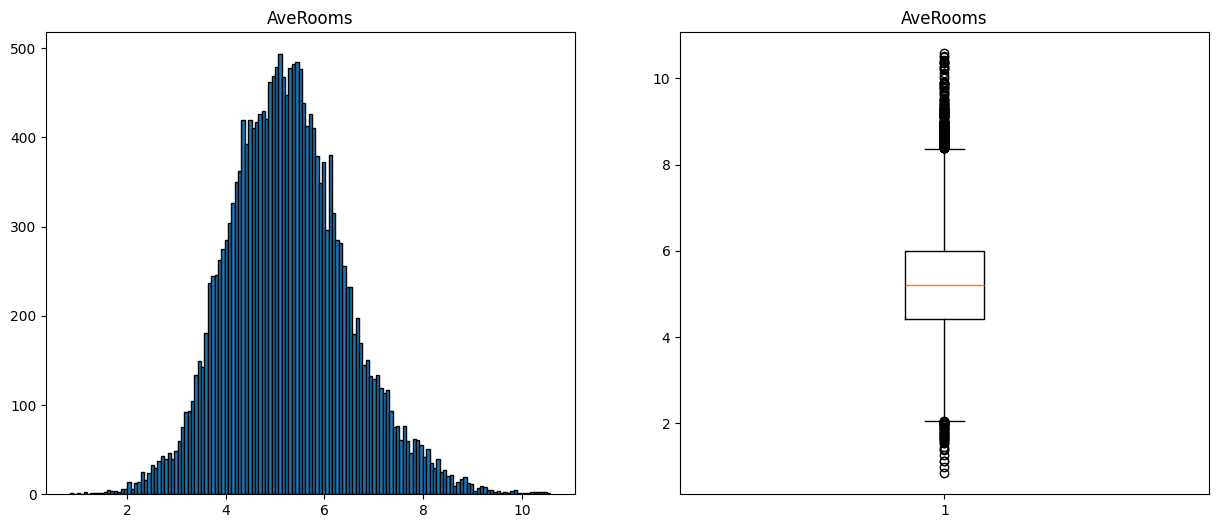

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['AveRooms'], bins=bins_value, edgecolor='black')
axes[0].set_title('AveRooms')

axes[1].boxplot(housing['AveRooms'])
axes[1].set_title('AveRooms');

Perfeito!

-------------

## population

population: Total number of people residing within a block

*) Novamente, vamos dividir pelo household e teremos a quantidade média de pessoas para cada domicílio

In [46]:
housing['population'].describe()

count    20232.000000
mean      1439.482256
std       1132.439136
min          3.000000
25%        801.000000
50%       1177.000000
75%       1737.250000
max      35682.000000
Name: population, dtype: float64

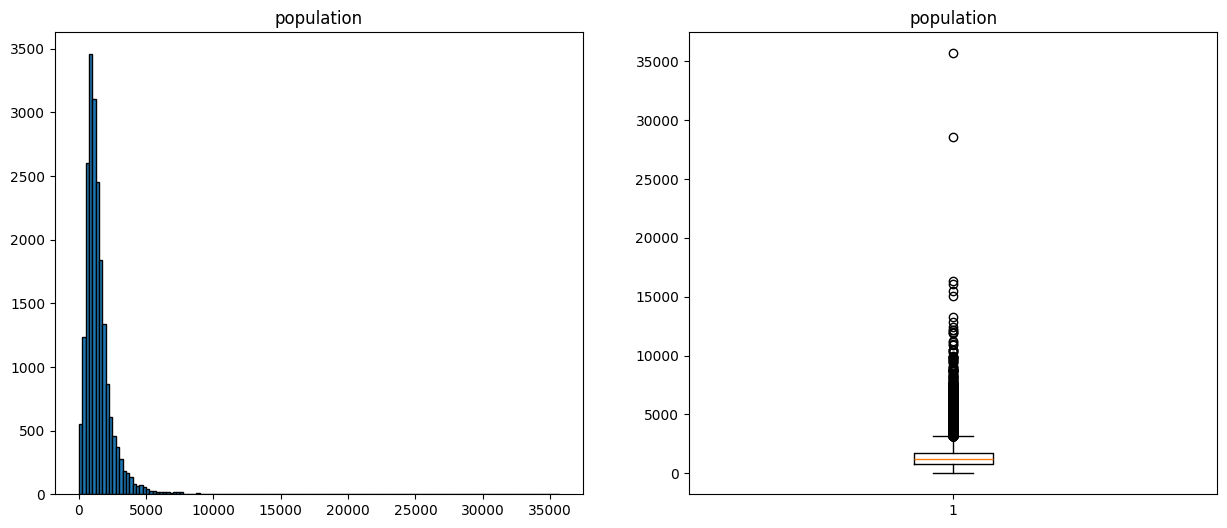

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['population'], bins=bins_value, edgecolor='black')
axes[0].set_title('population')

axes[1].boxplot(housing['population'])
axes[1].set_title('population');

In [48]:
# vamos criar a coluna nova:
housing['AveOccup'] = housing['population'] / housing['households']

C:\Users\gabri\AppData\Local\Temp\ipykernel_8544\499031249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['AveOccup'] = housing['population'] / housing['households']


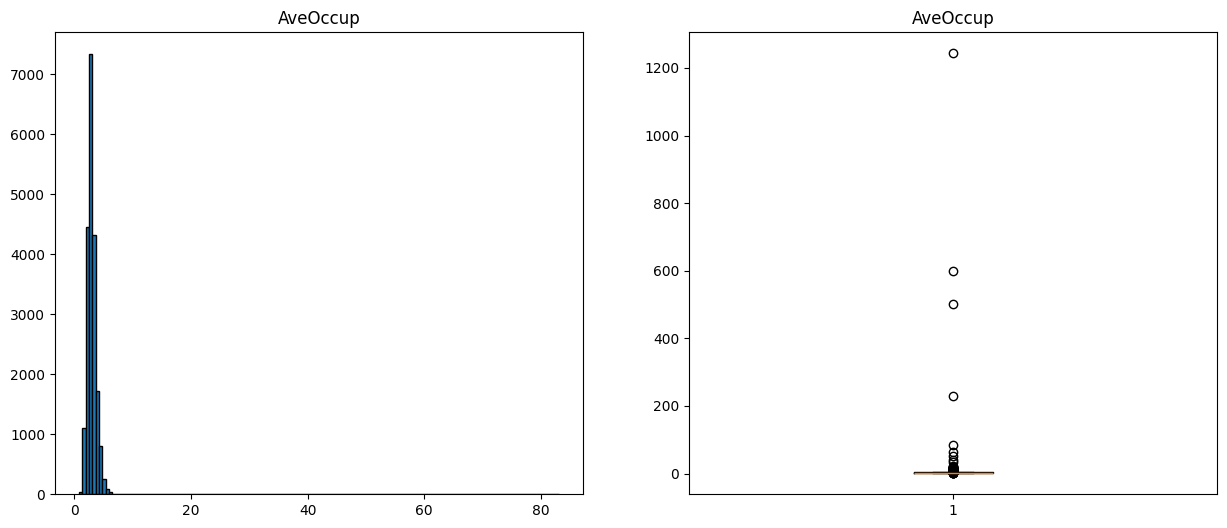

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['AveOccup'].where(lambda x: x < 100), bins=bins_value, edgecolor='black')
axes[0].set_title('AveOccup')

axes[1].boxplot(housing['AveOccup'])
axes[1].set_title('AveOccup');

#### Repare a quantidade de OUTLIERS!!! Vamos verificar o corte nesse ponto:

In [52]:
print('Quantidade de outliers: ', housing['AveOccup'].loc[housing['AveOccup'] > 6].shape)

Quantidade de outliers:  (107,)


## Conclusão:

- Vale a pena cortar esses outliers, novamente eles representam uma pequena parte do todo.

In [53]:
housing = housing.loc[housing['AveOccup'] < 6]

In [54]:
housing.shape

(20124, 13)

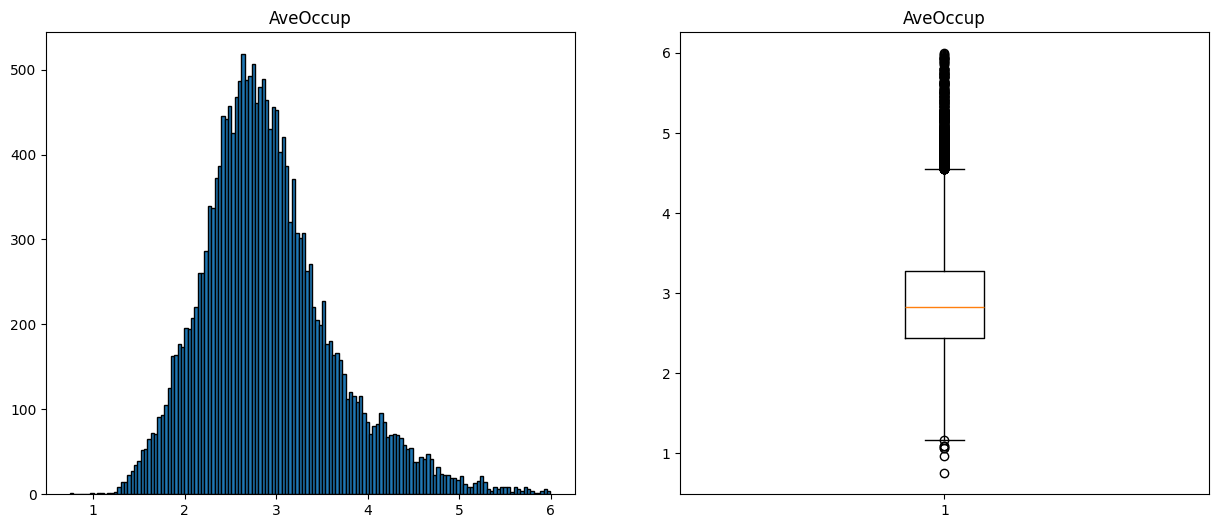

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['AveOccup'], bins=bins_value, edgecolor='black')
axes[0].set_title('AveOccup')

axes[1].boxplot(housing['AveOccup'])
axes[1].set_title('AveOccup');

Perfeito!! Repare como estava o gráfico antes e como está agora! Está bem mais comportado.

-----------

### medianIncome

medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

In [57]:
housing['median_income'].describe()

count    20124.000000
mean         3.879005
std          1.892595
min          0.499900
25%          2.568575
50%          3.545050
75%          4.762275
max         15.000100
Name: median_income, dtype: float64

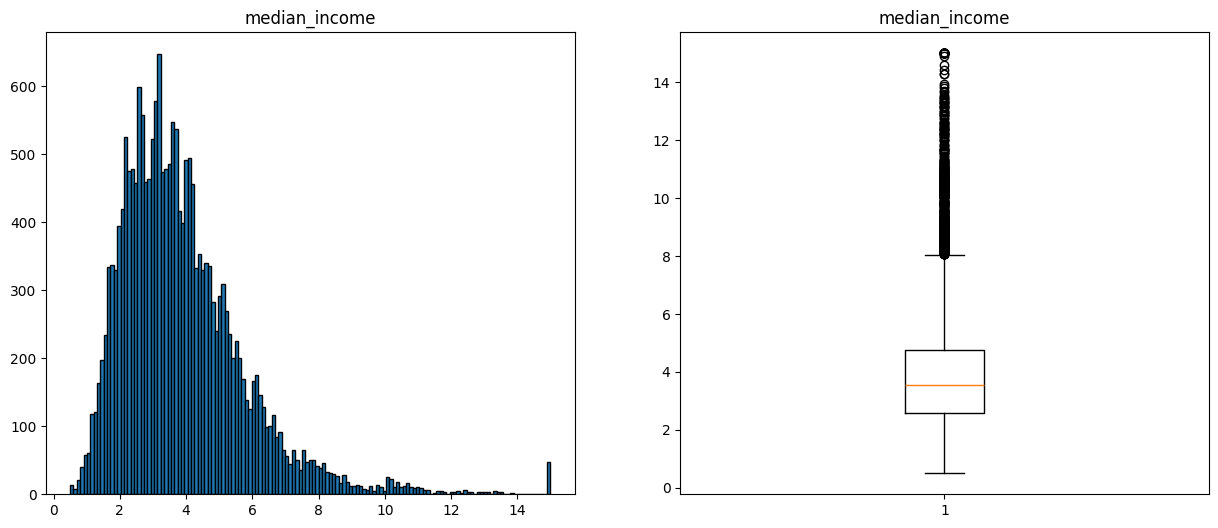

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['median_income'], bins=bins_value, edgecolor='black')
axes[0].set_title('median_income')

axes[1].boxplot(housing['median_income'])
axes[1].set_title('median_income');

Note que temos bastante outliers e uma leve saturação na ponta direita do gráfico. Vamos aplicar o log e tirar alguns outliers

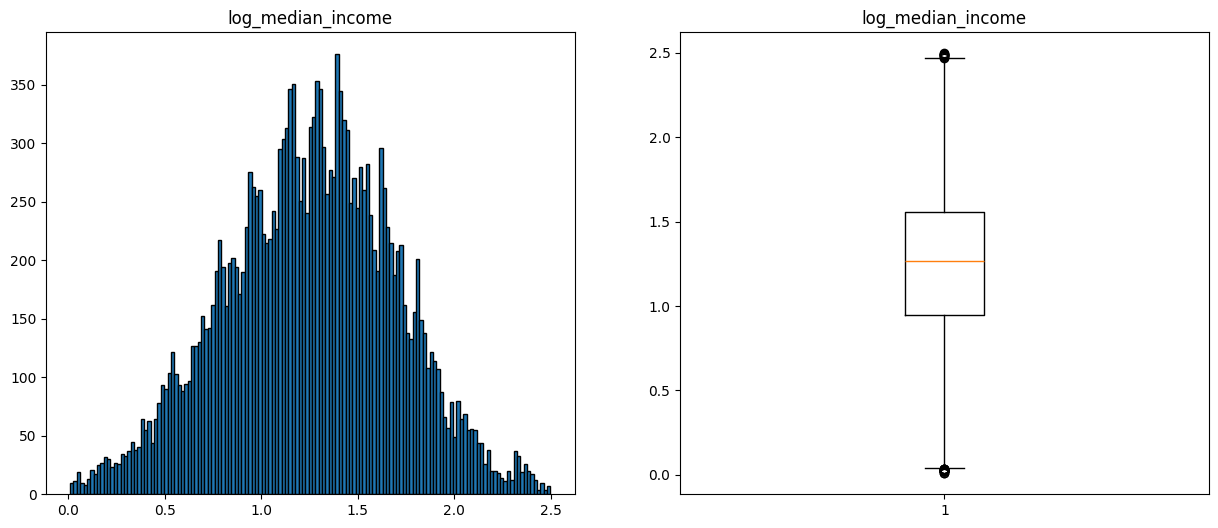

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(np.log(housing['median_income']).where(lambda x: (x > 0.0)).where(lambda x: (x < 2.5)).dropna(), bins=bins_value, edgecolor='black')
axes[0].set_title('log_median_income')

axes[1].boxplot(np.log(housing['median_income']).where(lambda x: (x > 0.0)).where(lambda x: (x < 2.5)).dropna())
axes[1].set_title('log_median_income');

In [60]:
housing['log_median_income'] = np.log(housing['median_income'])

In [61]:
# Validação de corte: 
print('Quantidade de outliers que entrarão no corte: ', housing['log_median_income'].loc[(housing['log_median_income'] > 2.5) | (housing['log_median_income'] < 0.0)].shape)
print('É uma quantidade baixa em relação ao todo, portanto podemos cortar.')

Quantidade de outliers que entrarão no corte:  (239,)
É uma quantidade baixa em relação ao todo, portanto podemos cortar.


In [62]:
housing = housing.loc[(housing['log_median_income'] < 2.5) & (housing['log_median_income'] > 0.0)]

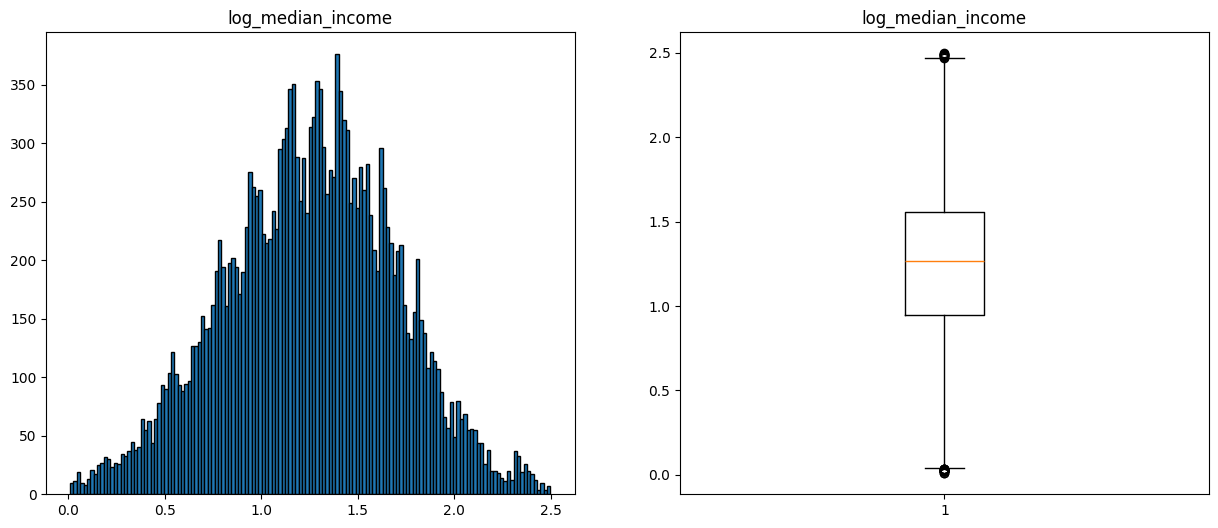

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['log_median_income'], bins=bins_value, edgecolor='black')
axes[0].set_title('log_median_income')

axes[1].boxplot(housing['log_median_income'])
axes[1].set_title('log_median_income');

Bem menos outliers!! 

---------

## median_house_value (target)

medianHouseValue: Median house value for households within a block (measured in US Dollars)

In [64]:
housing['median_house_value'].describe()

count     19881.000000
mean     206896.873749
std      113872.282838
min       14999.000000
25%      120800.000000
50%      181300.000000
75%      264900.000000
max      500001.000000
Name: median_house_value, dtype: float64

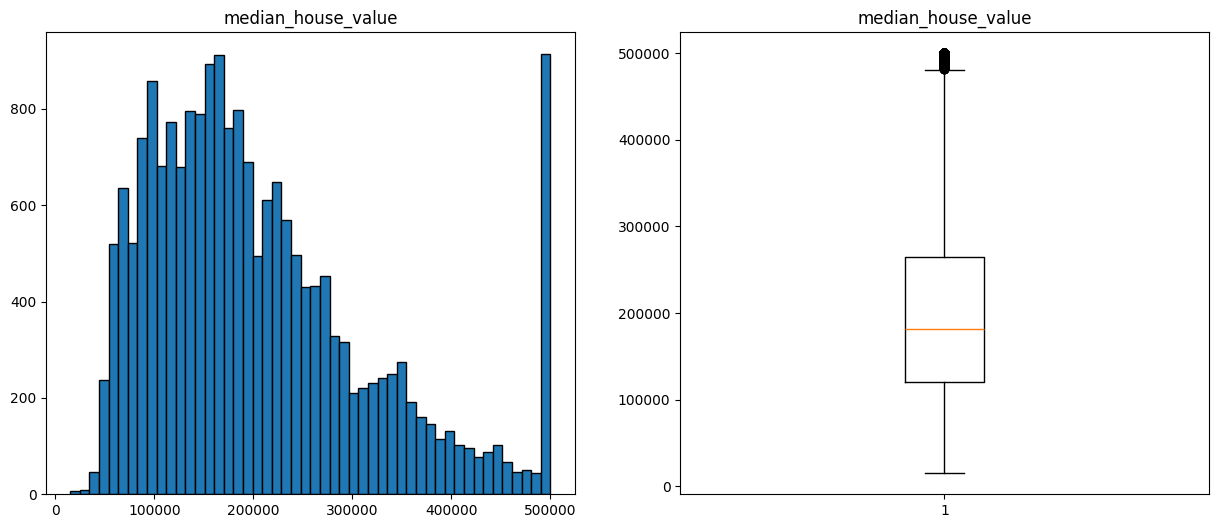

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['median_house_value'], bins=50, edgecolor='black')
axes[0].set_title('median_house_value')

axes[1].boxplot(housing['median_house_value'])
axes[1].set_title('median_house_value');

Note que o target possui uma saturação em 500_000, novamente, podemos resolver essa saturação cortando os pontos de 500_000. Além disso, o gráfico possui uma leve assimetria a direita, indicando talvez a necessidade do log.

Vamos avaliar:

In [68]:
housing['median_house_value'].loc[(housing['median_house_value'] > 500_000) | (housing['median_house_value'] < 60_000)].shape

(1474,)

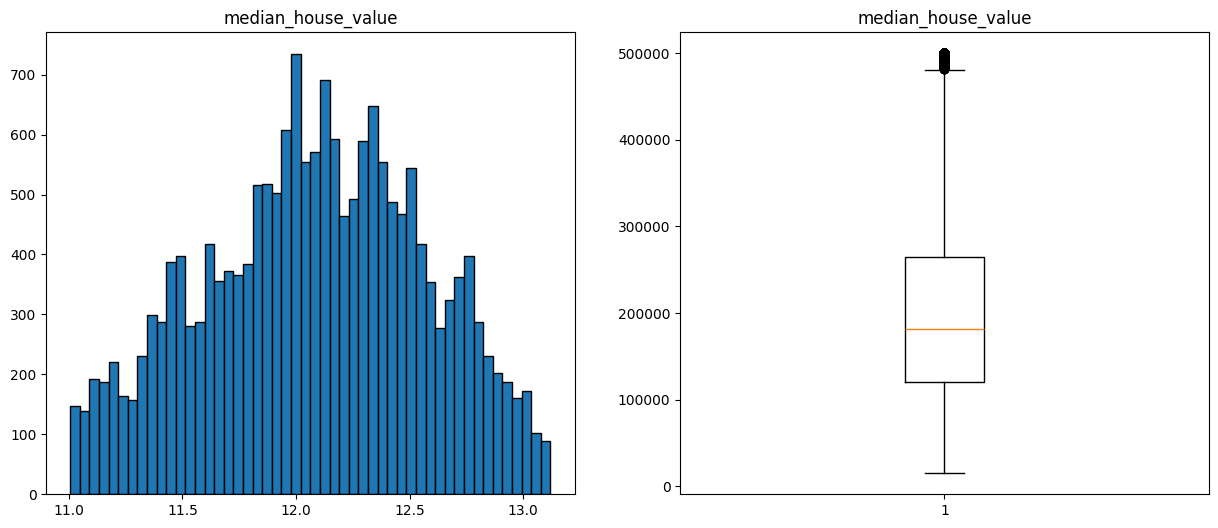

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(np.log(housing['median_house_value'].loc[(housing['median_house_value'] < 500_000) & (housing['median_house_value'] > 60_000)]), bins=50, edgecolor='black')
axes[0].set_title('median_house_value')

axes[1].boxplot(housing['median_house_value'])
axes[1].set_title('median_house_value');

Novamente, uma restrição: Nosso modelo irá se restringir a imóveis que custam mais que 60_000 e menos que 500_000!

In [70]:
housing['log_median_house_value'] = np.log(housing['median_house_value'].loc[(housing['median_house_value'] < 500_000) & (housing['median_house_value'] > 60_000)])

In [71]:
housing = housing.dropna()

------------

------------

### Finalmente, vamos ficar só com as features que vamos usar:

In [72]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'AveRooms', 'AveBedrooms',
       'AveOccup', 'log_median_income', 'log_median_house_value'],
      dtype='object')

In [75]:
features = ['AveRooms', 'AveBedrooms', 'AveOccup', 'log_median_income']
target = ['log_median_house_value']

In [77]:
housing_pre = housing[features + target]

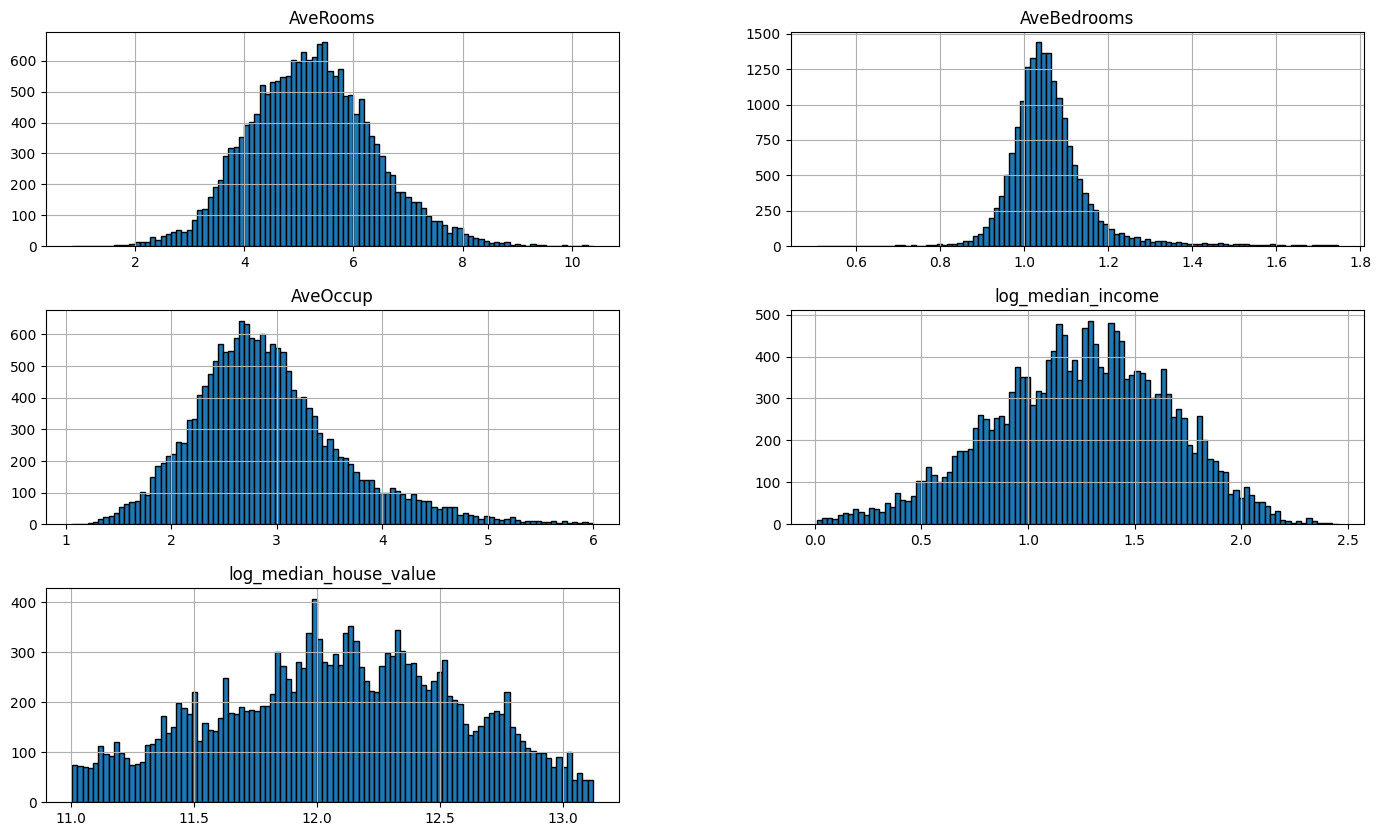

In [78]:
housing_pre[['AveRooms', 'AveBedrooms', 'AveOccup', 'log_median_income'] + target].hist(figsize=[17, 10], bins=100, edgecolor='black');

## 3) Pré-processamento

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [102]:
X_, y = housing_pre[features], housing_pre[target]

In [105]:
X

NameError: name 'X' is not defined

In [108]:
# Vamos criar pipelines para tratar os valores abaixo

pipe_num = Pipeline([
    ('Scaler', MinMaxScaler())
])

pipe_cat = Pipeline([
    # Lembre-se de dropar uma das colunas para que a equação X.T @ X tenha inversa!! (Se você usar modelos lineares com regularização aqui não tem problema)
    ('OneHot', OneHotEncoder(drop='first'))
])

c_transform = ColumnTransformer([
    ('pipe_num', pipe_num, ['AveRooms', 'AveBedrooms', 'AveOccup', 'log_median_income']), # 5 colunas
])

In [109]:
X = c_transform.fit_transform(X_)

In [110]:
X.shape # Teremos 8 colunas no final, pois dropamos a primeira

(18369, 4)

In [111]:
# Separação treino-teste
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Agora esquecemos o Conjunto de Testes por enquanto!

## 4) Modelos 

Vamos selecionar alguns modelos para avaliar!

In [112]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import mean_squared_error

class SimpleModel(BaseEstimator, ClassifierMixin):
    
    def __init__(self):
        self.mean = 0
    
    def fit(self, X, y):
        self.mean = y.mean()
        return self

    def predict(self, X):
        return self.mean[0] * np.ones(shape=[X.shape[0], 1])

In [114]:
trivial = SimpleModel() # Trivial
baseline = LinearRegression() # Baseline
models = [trivial, baseline]
m_names = ['trivial', 'baseline', 'Linear Regression']

In [115]:
def display_scores(scores):
    print('Scores:', scores.round(decimals=4))
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

### Lembrete:

Note que fizemos o nosso modelo para prever o valor do $\ln y$, logo, teremos que nossa métrica será:
$$MSE = \frac{1}{m} \sum (\ln \hat y - \ln y) ^{2}$$
$$MSE = \frac{1}{m} \sum (\ln\frac{\hat y}{y}) ^{2}$$

Portanto, note que otimizamos para minimizar o erro relativo, pelo fato de termos passa o log no target. Dessa forma, vamos tirar a raiz e passar a função np.exp(), para termos o valor do erro médio relativo.


In [116]:
scores = {}
for m_name, model in zip(m_names, models):
    print(f'-----------{m_name}-------------')
    model_scores = cross_val_score(
                        model,  # modelo
                        X_train_full,  # X_train
                        y_train_full,  # y_train
                        scoring='neg_mean_squared_error',  # metrica de interesse
                        cv=10,  # Quantas partições eu quero
                        n_jobs=-1,  # Use todos os cores da maquina!
                    )
    model_rmse_scores = np.exp(np.sqrt(-model_scores)) # RMSE -> Erro médio relativo
    display_scores(model_rmse_scores)
    scores[m_name] = model_rmse_scores
    print('------------------------------------------')

-----------trivial-------------
Scores: [nan nan nan nan nan nan nan nan nan nan]
Mean: nan
Standard deviation: nan
------------------------------------------
-----------baseline-------------
Scores: [1.4082 1.4192 1.417  1.4247 1.3949 1.4187 1.4119 1.429  1.4159 1.4262]
Mean: 1.4165793206044175
Standard deviation: 0.009404942950069118
------------------------------------------


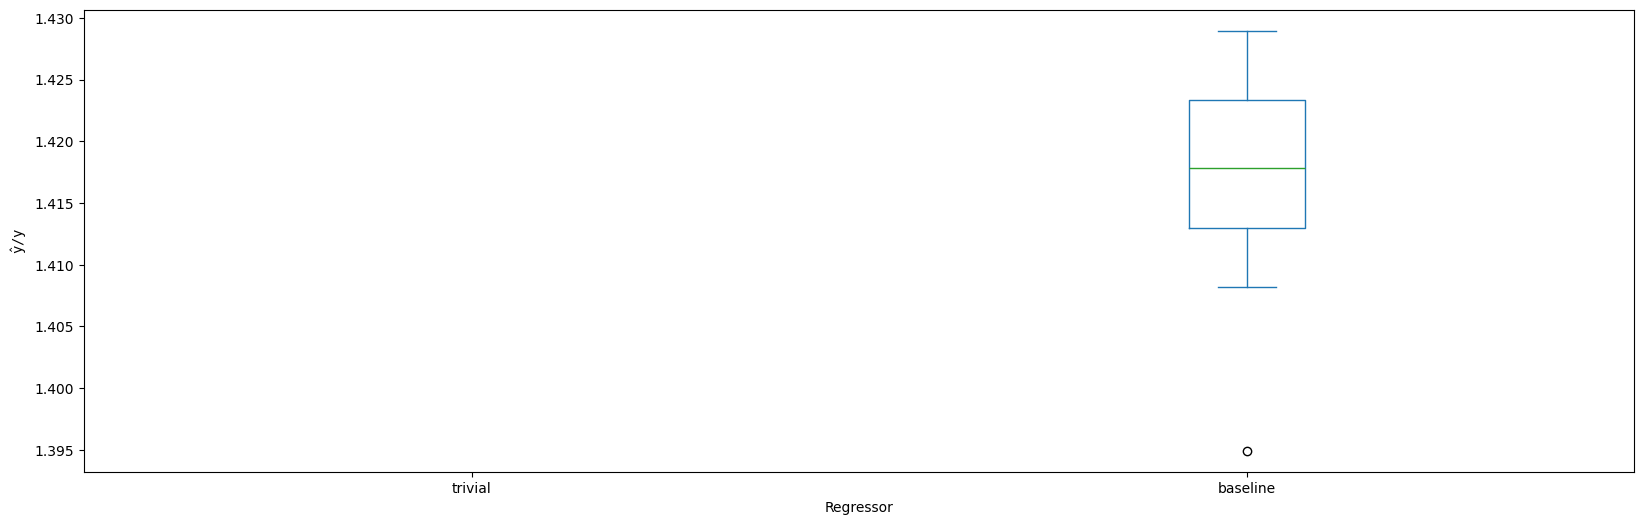

In [117]:
pd.DataFrame(scores).plot.box(
    xlabel='Regressor',
    ylabel=r'$\mathtt{\hat y / y}$',
    figsize=(20, 6),
);

In [97]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.11875496, 0.0640399 , 0.12832423, 0.06324407, 0.3583667 ,
       0.25437821, 0.00773072, 0.00516121])

In [125]:
linear_model = models[-1]
linear_model.fit(X_train_full, y_train_full)

LinearRegression()

In [127]:
linear_model.coef_, linear_model.intercept_

(array([[-1.46638845,  0.66900819, -0.57495993,  2.54129178]]),
 array([11.38806932]))

## 5) Medir Desempenho Final

Agora vamos utilizar o conjunto de testes para avaliar nosso modelo dentro de um conjunto de instâncias nunca vistas!

In [129]:
final_model = linear_model
final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.exp(np.sqrt(final_mse))

print(f'Erro Médio Relativo (y_hat / y) = {final_rmse}')
print(f'Erro Médio Relativo (delta y_hat / y) = {final_rmse - 1}')

Erro Médio Relativo (y_hat / y) = 1.4151076134978442
Erro Médio Relativo (delta y_hat / y) = 0.4151076134978442


In [130]:
from sklearn.metrics import r2_score

r2_score(y_test, final_predictions)

0.5036797104310862

------------

## O que é uma Regressão Linear?

Em suma, uma regressão linear é um modelo que, quando restrito ao caso particular de 2 dimensões, recai numa função afim, ou seja, do tipo $f(x) = ax + b$. Generalizando o modelo para mais dimensões, teremos a seguinte equação:

$$f(x_0, x_1, ..., x_n) = 1 \cdot x_0 + \theta_1 \cdot x_1 + ... + \theta_n \cdot x_n$$

O nosso conjunto de entrada será o vetor de atributos $\vec X = (x_0, x_1, ..., x_n)$, e o nosso vetor de parâmetros será $\vec \theta = (\theta_1, \theta_2, ..., \theta_n)$. de maneira simplificada, podemos escrever nossa função de regressão como sendo:

$$ f(\vec X) = \vec X \cdot \vec \theta$$

Por fim, dado que construimos nosso modelo, como podemos aplicar ele em um caso da vida real?

## Como podemos aplicar o modelo?

Note que, uma vez que para um determinado caso você tenha os valores dos parâmetros $\vec \theta$ definidos, é possível prever o valor de $f$ para uma instância de entrada $\vec{X^{(i)}}$. Isso pode ser muito útil no quesito de que podemos realizar predições de valores, dado conhecemos o vetor de entrada $\vec{X^{(i)}}$ e vetor de parâmetros $\vec \theta$ (fixos). 

Porém, e se não tivermos os valores do vetor de parâmetros? Como podemos determina-los?

## Como determinar os parâmetros do modelo?

Uma vez que temos um modelo construido, precisamos pensar em como determinar os valores dos parâmetros do nosso modelo. Para tanto, precisamos associar o modelo à uma função de custo. Isso se deve ao fato de que, uma vez que tenhamos um conjunto de dados, é possível determinar nossos parâmetros ao minimizar a nossa função de custo! 

Para o modelo de Regressão Linear, utilizaremos a função de custo como sendo o $MSE(\vec \theta)$. Por fim, para determinar os parâmetros, podemos seguir caminhos diversos, dois deles são: utilizar um método que citamos acima (Gradient Descent) ou podemos utilizar uma fórmula fechada para determinar o vetor $\hat \theta$ de parâmetros optimos.

Para a fórmula fechada, é possível deduzir que o vetor será dado por:

$$\hat \theta= (X^{T}X)^{-1} X^{T}y$$

Onde o $X$ acima é uma matriz com $m$ instâncias. Note que esse caso pode possuir problemas de convergência quando duas features são colineares, pois isso implicaria que:

$$det(X^{T}X) = 0 \Longleftrightarrow \nexists ~ (X^{T}X)^{-1}$$

Para tanto, uma solução para o problema acima pode ser: Regularizações na função de custo para escapar do problema de não existir a matriz inversa

## O que é Machine Learning?

Em primeiro lugar, é imprescindível que conceituemos o que é Machine Learning. Uma das definições mais famosas é uma de Arthur Samuel, cientista da computação e pioneiro na área de Inteligência Artificial: Machine Learning é a capacidade de dar ao computador a habilidade de realizar uma tarefa sem ele ser explicitamente programado para isso. Nesse aspecto, duas das tarefas mais utilizadas são: Classificação e Regressão. 

## No que isso impacta a sociedade?

Como visto na seção anterior, é possível realizar tarefas que auxiliam os humanos a tomarem decisões. Dentre elas, duas das mais comuns são: Regressão e Classificação. Em um contexto econômico, é possível utilizar modelos preditivos para determinar possíveis valores de ações no futuro (Tarefa de Regressão), dado um conjunto de features (features são valores que podemos utilizar para prever o preço final da ação). 

Além disso, ainda na área econômica, é possível utilizar modelos de classificação para determinar se um investimento hipotético pode trazer risco ou não para o patrimônio de um determinado investidor. Para tanto, é preciso treinar um modelo para reconhecer tais características. 

Vale ressaltar, novamente, que as tarefas de regressão e classificação são realizadas sem serem explicitamente programadas para tal. Em outras palavras, o modelo aprende a inferir um target de acordo com as regras implicitamente inerentes aos dados fornecidos ao modelo.
